In [1]:
import sys

In [2]:
sys.executable

'/home/chuhk/anaconda3/envs/pix2pix/bin/python'

# Focal loss

In [3]:
#g, gt 각 16, 3, 5, 96, 96
def batch_rgb2gray(img):
    r, g, b = img[:, 0], img[:, 1], img[:, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def focal_loss(g, gt):
    epsilon = 1e-8
    #input : batch_size, channel, Tv, height, width
    
    alpha = 1

    orth_norm_term = np.sqrt(256 * 256)
    
    fake_gray = batch_rgb2gray(g) # 16, 5, 96, 96

    real_gray = batch_rgb2gray(gt) # 16, 5, 96, 96

#     real_fft = torch.rfft(real_gray, signal_ndim = 2, onesided = False) # 16, 5, 96, 96, 2

#     fake_fft = torch.rfft(fake_gray, signal_ndim = 2, onesided = False) # 16, 5, 96, 96, 2
    real_fft = torch.fft.fft2(real_gray) # 16, 5, 96, 96, 2

    fake_fft = torch.fft.fft2(fake_gray) # 16, 5, 96, 96, 2

    real_fft /= orth_norm_term

    fake_fft /= orth_norm_term


    x_dist = (real_fft.real - fake_fft.real) ** 2

    y_dist = (real_fft.imag - fake_fft.imag) ** 2

    distance_matrix = torch.sqrt(x_dist + y_dist + epsilon)

    squared_distance = distance_matrix ** 2

    weight_matrix = distance_matrix ** alpha
    
    if torch.min(weight_matrix) == torch.max(weight_matrix):
        print("min equal max == 0")

    norm_weight_matrix = (weight_matrix - torch.min(weight_matrix)) /  (torch.max(weight_matrix) - torch.min(weight_matrix))

    prod = torch.mul(squared_distance, norm_weight_matrix)

    FFL = torch.sum(prod) / (256 * 256 * 1)
    
    return FFL

In [4]:
import torch
import numpy as np

In [5]:
torch.__version__

'1.9.0+cu102'

In [6]:
import cv2

In [7]:
# g = cv2.imread('/home/chuhk/data/vanilla/with_focal_resize64/00000.jpg')
g = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/fake_imgs/with_focal/22_fake_B.png')
g = g / 255.0

# g = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/checkpoints/without_focal_2/facades_pix2pix/web/images/epoch150_fake_B.png')
# g = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/checkpoints/focal_shift/facades_pix2pix/web/images/epoch150_fake_B.png')

In [8]:
g = torch.tensor(g, dtype = torch.float32)

In [9]:
g = g.unsqueeze(0)

In [10]:
g = torch.transpose(g, 2, 3)
g = torch.transpose(g, 1, 2)

In [11]:
g.size()

torch.Size([1, 3, 256, 256])

In [12]:
g.requires_grad_()

tensor([[[[0.4000, 0.5294, 0.5137,  ..., 0.6980, 0.6902, 0.6431],
          [0.2510, 0.2980, 0.4157,  ..., 0.5451, 0.4902, 0.5725],
          [0.2314, 0.2314, 0.3020,  ..., 0.2588, 0.2314, 0.2627],
          ...,
          [0.3725, 0.2784, 0.1804,  ..., 0.3686, 0.3098, 0.2275],
          [0.4039, 0.4588, 0.4745,  ..., 0.3490, 0.3373, 0.2667],
          [0.5412, 0.6902, 0.7765,  ..., 0.2275, 0.2745, 0.2941]],

         [[0.3725, 0.4784, 0.4824,  ..., 0.7137, 0.6902, 0.6745],
          [0.2431, 0.2314, 0.3333,  ..., 0.5765, 0.5176, 0.5569],
          [0.2235, 0.1686, 0.2510,  ..., 0.3020, 0.2627, 0.2588],
          ...,
          [0.3922, 0.2863, 0.2039,  ..., 0.2980, 0.2667, 0.2392],
          [0.4196, 0.4627, 0.4980,  ..., 0.2784, 0.2784, 0.2745],
          [0.5569, 0.6902, 0.7647,  ..., 0.2118, 0.2588, 0.2784]],

         [[0.3647, 0.4353, 0.4745,  ..., 0.7216, 0.7059, 0.6667],
          [0.2275, 0.2431, 0.4078,  ..., 0.5569, 0.5137, 0.5686],
          [0.1922, 0.2000, 0.2745,  ..., 0

In [13]:
# gt = cv2.imread('/home/chuhk/data/dtd/test_images/00000.jpg')
gt = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/fake_imgs/groundtruth/22_real_B.png')
gt = gt / 255.0
# gt = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/checkpoints/focal_shift/facades_pix2pix/web/images/epoch150_real_B.png')

In [14]:
gt = torch.tensor(gt, dtype = torch.float32)
# gt = torch.tensor(gt)

In [15]:
gt = gt.unsqueeze(0)

In [16]:
gt = torch.transpose(gt, 2, 3)
gt = torch.transpose(gt, 1, 2)

In [17]:
gt.size()

torch.Size([1, 3, 256, 256])

In [18]:
gt.requires_grad_()

tensor([[[[0.7765, 0.7608, 0.7765,  ..., 0.6000, 0.5882, 0.5882],
          [0.6235, 0.5686, 0.5608,  ..., 0.5490, 0.5608, 0.5373],
          [0.5725, 0.6706, 0.6824,  ..., 0.7373, 0.7569, 0.7216],
          ...,
          [0.2157, 0.1294, 0.2039,  ..., 0.0745, 0.0902, 0.1020],
          [0.1686, 0.1725, 0.1725,  ..., 0.0627, 0.0667, 0.0549],
          [0.1294, 0.1137, 0.1255,  ..., 0.0353, 0.0471, 0.0392]],

         [[0.7098, 0.6941, 0.7098,  ..., 0.5765, 0.5647, 0.5647],
          [0.5765, 0.5216, 0.5255,  ..., 0.5725, 0.5843, 0.5608],
          [0.5725, 0.6706, 0.6824,  ..., 0.8118, 0.8314, 0.7961],
          ...,
          [0.2078, 0.1333, 0.2078,  ..., 0.0667, 0.0824, 0.0941],
          [0.1333, 0.1451, 0.1529,  ..., 0.0627, 0.0667, 0.0549],
          [0.0824, 0.0667, 0.0784,  ..., 0.0471, 0.0588, 0.0471]],

         [[0.6745, 0.6588, 0.6745,  ..., 0.5961, 0.5843, 0.5843],
          [0.5686, 0.5137, 0.5098,  ..., 0.5922, 0.6039, 0.5804],
          [0.5961, 0.6941, 0.7059,  ..., 0

In [16]:
# focal_loss(g, gt)

# 3 channel 2D DFT in torch 1.9.0

In [40]:
#g, gt 각 16, 3, 5, 96, 96
def batch_rgb2gray(img):
    r, g, b = img[:, 0], img[:, 1], img[:, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# def focal_loss(g, gt)
epsilon = 1e-8
#input : batch_size, channel, Tv, height, width

alpha = 1

###
# g = batch_rgb2gray(g)
# gt = batch_rgb2gray(gt)
###


fake_fft = torch.fft.fft2(g, norm = 'ortho') # 16, 5, 96, 96, 2
fake_fft = torch.fft.fftshift(fake_fft)
real_fft = torch.fft.fft2(gt, norm = 'ortho') # 16, 5, 96, 96, 2
real_fft = torch.fft.fftshift(real_fft)
## torch.fft.fft2(real_gray, norm="ortho") 

x_dist = (real_fft.real - fake_fft.real) ** 2

y_dist = (real_fft.imag - fake_fft.imag) ** 2

distance_matrix = torch.sqrt(x_dist + y_dist + epsilon) ## sqrt 계산 후 epsilon을 더해주는 경우의 수

squared_distance = distance_matrix ** 2

weight_matrix = distance_matrix ** alpha

if torch.min(weight_matrix) == torch.max(weight_matrix):
    print("min equal max == 0")

norm_weight_matrix = (weight_matrix - torch.min(weight_matrix)) /  (torch.max(weight_matrix) - torch.min(weight_matrix))

prod = torch.mul(squared_distance, norm_weight_matrix)

FFL = torch.sum(prod) / (256 * 256 *3)
# FFL = torch.sum(prod) / (256 * 256)



In [18]:
FFL

tensor(816.4343)

In [20]:
path = './np/1_9_0/'

In [41]:
ff = np.fft.fft2(g.detach().cpu().numpy(), norm = 'ortho')
ff = np.fft.fftshift(ff)

In [42]:
rf = np.fft.fft2(gt.detach().cpu().numpy(), norm = 'ortho')
rf = np.fft.fftshift(rf)

In [43]:
x_d = (rf.real - ff.real) ** 2
y_d = (rf.imag - ff.imag) ** 2
d_m = np.sqrt(x_d + y_d + epsilon)
s_d = d_m ** 2
w_m = d_m ** alpha

n_w_m = (w_m - np.min(w_m)) / (np.max(w_m) - np.min(w_m))

p = np.multiply(s_d, n_w_m)
ffll = np.sum(p) / (256*256*3)

In [44]:
ffll

0.012127148577525391

In [45]:
FFL

tensor(0.0121, grad_fn=<DivBackward0>)

# 1.1.0

In [49]:
gg = batch_rgb2gray(g)

In [50]:
gg.shape

torch.Size([1, 64, 64])

In [51]:
g_fft = torch.rfft(gg, signal_ndim = 2, onesided =False)

In [19]:
torch.__version__

'1.1.0'

In [55]:
torch.save(g_fft, 'torch_110_rfft.pt')

In [22]:
asd = torch.load('torch_110_rfft.pt')

In [25]:
asd.size()

torch.Size([1, 64, 64, 2])

# check

In [191]:
import matplotlib.pyplot as plt

In [208]:
g = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/w_focal/22_fake_B.png', 0)

In [209]:
gt = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/groundtruth/22_real_B.png', 0)

In [210]:
# g = cv2.imread('/home/chuhk/data/vanilla/with_focal_resize64/00000.jpg')
org = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/wo_focal/22_fake_B.png', 0)

In [211]:
g_2 = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/w_focal_2/22_fake_B.png', 0)

In [212]:
pre = cv2.imread('/home/chuhk/code/pytorch-CycleGAN-and-pix2pix/pretrained/22_fake_B.png', 0)

In [213]:
"""
g : gray scale focal
gt : groundtruth

org : no additional loss
g_2 : color image
pre : pretrained model
"""
"""
pretrained -> pretrained 모델
wo_focal -> 기존 loss로 학습
w_focal -> gray scale 2D DFT
w_focal_2 -> color 2D DFT
w_focal3 -> prod.requires_grad_()


2_2 -> color 2D 재학습
"""

'\ng : gray scale focal\ngt : groundtruth\n\norg : no additional loss\ng_2 : color image\npre : pretrained model\n'

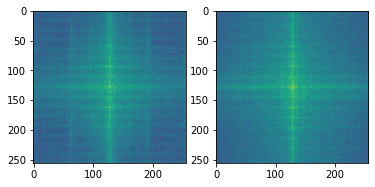

In [214]:
f = np.fft.fft2(g)
fshift = np.fft.fftshift(f)
mag_spec = 20 * np.log(np.abs(fshift))

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(mag_spec)

f = np.fft.fft2(gt)
fshift = np.fft.fftshift(f)
mag_spec = 20 * np.log(np.abs(fshift))

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(mag_spec)

plt.show()

# FFT SHIFT

In [15]:
#g, gt 각 16, 3, 5, 96, 96
def batch_rgb2gray(img):
    r, g, b = img[:, 0], img[:, 1], img[:, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# def focal_loss(g, gt)
epsilon = 1e-8
#input : batch_size, channel, Tv, height, width

alpha = 1

###
# g = batch_rgb2gray(g)
# gt = batch_rgb2gray(gt)
###


fake_fft = torch.fft.fft2(g, norm = 'ortho') # 16, 5, 96, 96, 2
fake_fft = torch.fft.fftshift(fake_fft)

real_fft = torch.fft.fft2(gt, norm = 'ortho') # 16, 5, 96, 96, 2
real_fft = torch.fft.fftshift(real_fft)

## torch.fft.fft2(real_gray, norm="ortho") 

x_dist = (real_fft.real - fake_fft.real) ** 2

y_dist = (real_fft.imag - fake_fft.imag) ** 2

distance_matrix = torch.sqrt(x_dist + y_dist + epsilon) ## sqrt 계산 후 epsilon을 더해주는 경우의 수

squared_distance = distance_matrix ** 2

weight_matrix = distance_matrix ** alpha

if torch.min(weight_matrix) == torch.max(weight_matrix):
    print("min equal max == 0")

norm_weight_matrix = (weight_matrix - torch.min(weight_matrix)) /  (torch.max(weight_matrix) - torch.min(weight_matrix))

prod = torch.mul(squared_distance, norm_weight_matrix)

# FFL = torch.sum(prod) / (256 * 256 *3)
FFL = torch.sum(prod) / (256 * 256 * 3)



In [123]:
FFL

tensor(0.0377)

# Spectral Regularization

In [ ]:
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.
    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [ ]:
def RGB2gray(img):
    r, g, b = img[0], img[1], img[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [ ]:
## Generate image 1D power spectrum
def cal_freq_loss(x_fake, x_real):
    #input : batch, channel, Tv, height, width
    criterion_freq = nn.BCELoss()
    t = 1 # 16
    N = 179
    epsilon = 1e-8
    
    psd1D_img = np.zeros([x_fake.shape[0], N])

    #temp_Tv_img = np.zeros([x_fake.shape[1], N])

    for t in range(x_fake.shape[0]):gf * 8, ngf

        temp_Tv_img = np.zeros([x_fake.shape[1], N])

        gen_imgs = x_fake.permute(0, 1, 2, 3) # B * Tv * H * W * C

        # for u in range(gen_imgs.shape[1]):
        img_numpy = gen_imgs[t, :, :, :].cpu().detach().numpy()
        img_gray = RGB2gray(img_numpy)
        fft = np.fft.fft2(img_gray)
        fshift = np.fft.fftshift(fft)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))
        psd1D = azimuthalAverage(magnitude_spectrum)
        #normalization -> [0, 1]
        psd1D = (psd1D-np.min(psd1D))/(np.max(psd1D)-np.min(psd1D))
        # temp_Tv_img[0, :] = psd1D # 5, 66

        # avg_Tv = np.average(temp_Tv_img, axis = 0)
        psd1D_img[t, :] = psd1D # 16, 66


    psd1D_img = torch.from_numpy(psd1D_img).float()
    psd1D_img = Variable(psd1D_img, requires_grad = True)

    ## Ground truth image 1D power spectrum

    psd1D_gt = np.zeros([x_real.shape[0], N])

    for t in range(x_real.shape[0]):

        temp_Tv_gt = np.zeros([x_real.shape[1], N])

        gen_imgs = x_real.permute(0, 1, 2, 3) # B * Tv * H * W * C

        # for u in range(gen_imgs.shape[1]):
        img_numpy = gen_imgs[t, :, :, :].cpu().detach().numpy()
        img_gray = RGB2gray(img_numpy)
        fft = np.fft.fft2(img_gray)
        fshift = np.fft.fftshift(fft)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))
        psd1D = azimuthalAverage(magnitude_spectrum)
        #normalization -> [0, 1]
        psd1D = (psd1D-np.min(psd1D))/(np.max(psd1D)-np.min(psd1D))
        # temp_Tv_gt[0, :] = psd1D

        # avg_Tv = np.average(temp_Tv_gt, axis = 0)
        psd1D_gt[t, :] = psd1D


    psd1D_gt = torch.from_numpy(psd1D_gt).float()
    psd1D_gt = Variable(psd1D_gt, requires_grad = True)


    loss_freq = criterion_freq(psd1D_gt, psd1D_img.detach())
    
    return loss_freq, psd1D_gt, psd1D_img

In [29]:
torch.fft.rfft2(g).shape

torch.Size([1, 3, 256, 129])